<a href="https://colab.research.google.com/github/SeongBumKim/Dataanalysis/blob/master/06_pandas_%EC%A0%84%EC%B2%98%EB%A6%AC_%EC%B6%94%EA%B0%80_%EC%82%AD%EC%A0%9C_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B3%80%ED%99%98_seongbum_231025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 패키지 설치

In [12]:
!pip install mySUNI

## 모듈 import

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
from mySUNI import cds
from IPython.display import Image

## 데이터셋 로드

In [14]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


**컬럼(columns) 설명**

- survivied: 생존여부 (1: 생존, 0: 사망)
- pclass: 좌석 등급 (1등급, 2등급, 3등급)
- sex: 성별
- age: 나이
- sibsp: 형제 + 배우자 수
- parch: 부모 + 자녀 수
- fare: 좌석 요금
- embarked: 탑승 항구 (S, C, Q)
- class: pclass와 동일
- who: 성별과 동일
- adult_male: 성인 남자 여부
- deck: 데크 번호 (알파벳 + 숫자 혼용)
- embark_town: 탑승 항구 이름
- alive: 생존여부 (yes, no)
- alone: 혼자 탑승 여부

## 새로운 컬럼 추가

In [15]:
df1 = df.copy()

In [16]:
df1.head()
# display(df1.head()) 뒤에 실행문이 나올경우 display or print를 통해 출력

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [17]:
A = {}
A['name'] = 'Seongbum'
A['Age'] = 29    # insert
A['Age'] = 30    # update
A['Age']    # select

30

In [18]:
# 객체 저장
# pip install shelve
import shelve

with shelve.open('mydata') as f:
  f['df'] = df
  f['df1'] = df1
  f['myname'] = 'seongbum'


In [19]:
import shelve

with shelve.open('mydata') as myobj:
  # print(dir(myobj))    # myobj로 사용가능한 기능 확인
  # print(list(myobj.keys()))    # 무슨 열로 구성되는지 확인
  name = myobj['myname']
  df = myobj['df']
  df1 = myobj['df']
  print(name)

seongbum


임의의 값을 **대입**하여 새로운 컬럼을 추가할 수 있습니다.

In [20]:
# df1에 True로 채워진 'VIP' 컬럼을 추가합니다.
df1['VIP'] = True

In [21]:
df1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,VIP
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,True
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,True
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,True
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,True


In [22]:
def add(a,b,/):
  return a + b
add(10, 20)
# add(a=10, b=20) ./ 때문에 a, b에 값 할당하지 못함
# (*, a, b, /) * : 뒤에 값할당가능, .: 앞에 값 할당 불가

30

## 삭제

삭제는 **행(row) 삭제와 열(column) 삭제**로 구분할 수 있습니다.

### 행 (row) 삭제

행 삭제시 **index를 지정하여 삭제**합니다.

In [23]:
# df1의 1번 행을 삭제합니다.
df1.drop(1)
# df1.drop(1, axis = 0)    # label 먼저 값을 입력해야함. 그 뒤에 keyword(*, 뒤에 있는 것들)가 와야함;

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,VIP
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,True
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,True
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,True


행 삭제시 **범위(목록)를 지정하여 삭제**할 수 있습니다.

In [24]:
df1.index[0:10]

RangeIndex(start=0, stop=10, step=1)

In [25]:
temp = pd.DataFrame({'A':[1,2,3,4,5], 'B':[6,7,8,9,10]}, index=list('abcde'))
temp

,A,B
a,1,6
b,2,7
c,3,8
d,4,9
e,5,10


In [26]:
temp.drop(['a','b','c']) # temp.iloc[3:]

,A,B
d,4,9
e,5,10


In [27]:
temp.drop(temp.index[:3])

,A,B
d,4,9
e,5,10


In [28]:
# df1에서 0 ~ 9번 행을 삭제합니다
# df1.drop(df1.index[:10])
df1.iloc[10:]     # 10번부터 끝까지 가져오기

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,VIP
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False,True
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True,True
12,0,3,male,20.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,True
13,0,3,male,39.0,1,5,31.2750,S,Third,man,True,NaN,Southampton,no,False,True
14,0,3,female,14.0,0,0,7.8542,S,Third,child,False,NaN,Southampton,no,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,True


**fancy indexing**을 활용하여 삭제할 수 있습니다.

In [29]:
# df1에서 1, 3, 5, 7, 9 행을 삭제합니다.
df1.drop(index=[1,3,5,7,9])

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,VIP
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,True
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,True
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True,True
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,True


### 열 (column) 삭제

In [30]:
df1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,VIP
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,True
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,True
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,True
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,True


열 삭제시 **반드시 `axis=1` 옵션을 지정**해야 합니다. 2번째 위치에 지정시 `axis=`을 생략할 수 있습니다.

In [31]:
# df1의 'class' 열을 삭제하고, 앞에서부터 5개 데이터를 출력합니다.
# df1.drop('class', axis=1).head(3)
df1.drop(columns=['class']).head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,embark_town,alive,alone,VIP
0,0,3,male,22.0,1,0,7.2500,S,man,True,NaN,Southampton,no,False,True
1,1,1,female,38.0,1,0,71.2833,C,woman,False,C,Cherbourg,yes,False,True
2,1,3,female,26.0,0,0,7.9250,S,woman,False,NaN,Southampton,yes,True,True


In [32]:
df1.drop('class', 1).head()
# <ipython-input-39-09065c3651f2>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.
# drop except for the argument 'labels' will be keyword-only.
# df1.drop('class', 1).head()

<ipython-input-32-a34e5080579f>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df1.drop('class', 1).head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,embark_town,alive,alone,VIP
0,0,3,male,22.0,1,0,7.2500,S,man,True,NaN,Southampton,no,False,True
1,1,1,female,38.0,1,0,71.2833,C,woman,False,C,Cherbourg,yes,False,True
2,1,3,female,26.0,0,0,7.9250,S,woman,False,NaN,Southampton,yes,True,True
3,1,1,female,35.0,1,0,53.1000,S,woman,False,C,Southampton,yes,False,True
4,0,3,male,35.0,0,0,8.0500,S,man,True,NaN,Southampton,no,True,True


**다수의 컬럼(column) 삭제**도 가능합니다.

In [33]:
# df1에서 'who', 'deck', 'alive' 열을 삭제합니다.
df1.drop(columns=['who','deck','alive'])

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,embark_town,alone,VIP
0,0,3,male,22.0,1,0,7.2500,S,Third,True,Southampton,False,True
1,1,1,female,38.0,1,0,71.2833,C,First,False,Cherbourg,False,True
2,1,3,female,26.0,0,0,7.9250,S,Third,False,Southampton,True,True
3,1,1,female,35.0,1,0,53.1000,S,First,False,Southampton,False,True
4,0,3,male,35.0,0,0,8.0500,S,Third,True,Southampton,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,True,Southampton,True,True
887,1,1,female,19.0,0,0,30.0000,S,First,False,Southampton,True,True
888,0,3,female,NaN,1,2,23.4500,S,Third,False,Southampton,False,True
889,1,1,male,26.0,0,0,30.0000,C,First,True,Cherbourg,True,True


삭제된 내용을 바로 적용하려면 `inplace=True`를 지정합니다.

In [34]:
df1.drop(['who', 'deck', 'alive'], axis=1, inplace=True)

In [35]:
df1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,embark_town,alone,VIP
0,0,3,male,22.0,1,0,7.2500,S,Third,True,Southampton,False,True
1,1,1,female,38.0,1,0,71.2833,C,First,False,Cherbourg,False,True
2,1,3,female,26.0,0,0,7.9250,S,Third,False,Southampton,True,True
3,1,1,female,35.0,1,0,53.1000,S,First,False,Southampton,False,True
4,0,3,male,35.0,0,0,8.0500,S,Third,True,Southampton,True,True


## 컬럼간 연산

**컬럼(column) 과 컬럼 사이의 연산을 매우 쉽게 적용**할 수 있습니다.

In [36]:
df1 = df.copy()

**family(가족)**의 총합은 **sibsp**컬럼과 **parch**의 합산으로 구할 수 있습니다.

In [37]:
s1 = pd.Series([1,2,3], index=['a','b','c'])
s2 = pd.Series([1,2,3], index=['d','b','c'])
s1 + s1

a    2
b    4
c    6
dtype: int64

In [38]:
# df1의 'sibsp' 컬럼과 'parch' 컬럼을 더하여 'family'라는 새로운 컬럼을 추가한다.
df1['family'] = df1['sibsp'] + df1['parch']

In [39]:
df1[['sibsp', 'parch', 'family']].head()

,sibsp,parch,family
0,1,0,1
1,1,0,1
2,0,0,0
3,1,0,1
4,0,0,0


**문자열의 합 (이어붙히기)도 가능**합니다.

In [40]:
# df1의 'who' 컬럼과 'sex' 컬럼을 중간에 '-'을 넣어 이어붙이고
# 'gender'라는 이름의 컬럼으로 추가합니다.
df1['gender'] = df1['who'] + '-' + df1['sex']

In [41]:
df1[['who', 'sex', 'gender']].head()

,who,sex,gender
0,man,male,man-male
1,woman,female,woman-female
2,woman,female,woman-female
3,woman,female,woman-female
4,man,male,man-male


컬럼간 연산시 `round()`를 사용하여 소수점 자릿수를 지정할 수 있습니다.

**round(숫자, 소수 몇 째자리)**

In [42]:
int(3.9), int(3.999999), int(3.9999999999999999999999999)
# 소수점 15개까지 구분 가능
# float32 float64 float128

(3, 3, 4)

In [43]:
round(3.14), round(3.54), round(3.54, 0)

(3, 4, 4.0)

In [44]:
# df1의 'fare'를 'age'로나눈 값을 소수점 아래 두 자리까지 지정되도록 round 함수를 사용하여 처리하고,
# 'round'라는 컬럼으로 추가합니다.
round(df1['fare'] / df1['age'], 2).head(3)

0    0.33
1    1.88
2    0.30
dtype: float64

In [45]:
df1['round'] = (df1['fare'] / df1['age']).round(2)

In [46]:
df1[['fare', 'age', 'round']].head()

,fare,age,round
0,7.2500,22.0,0.33
1,71.2833,38.0,1.88
2,7.9250,26.0,0.30
3,53.1000,35.0,1.52
4,8.0500,35.0,0.23


In [47]:
pd.options.display.float_format = '{:,.2f}'.format
# 실제 반올림되는 것이 아니라, 보여지는 것만 소수점 아래 2자리까지 보여줌
s = pd.Series([1234.567, 345.1234])
s
display(s, s.sum())
# s.sum()은 Series/DataFrame이 아님 따라서 pd.option 적용을 받지 않음
# 별도로 format을 주어야 원하는 형식으로 표시하여 출력할 수 있음
display('{:,.2f}'.format(s.sum()), f'{s.sum():,.2f}')

0   1,234.57
1     345.12
dtype: float64

1579.6904

'1,579.69'

'1,579.69'

In [48]:
df1[['fare', 'age', 'round']].head()

,fare,age,round
0,7.25,22.00,0.33
1,71.28,38.00,1.88
2,7.92,26.00,0.30
3,53.10,35.00,1.52
4,8.05,35.00,0.23


연산시 1개의 컬럼이라도 **NaN 값을 포함하고 있다면 결과는 NaN** 이 됩니다.

In [49]:
df1.loc[df1['age'].isnull(), 'deck':].head()

,deck,embark_town,alive,alone,family,gender,round
5,NaN,Queenstown,no,True,0,man-male,NaN
17,NaN,Southampton,yes,True,0,man-male,NaN
19,NaN,Cherbourg,yes,True,0,woman-female,NaN
26,NaN,Cherbourg,no,True,0,man-male,NaN
28,NaN,Queenstown,yes,True,0,woman-female,NaN


## 타입 변환 (astype)

In [50]:
df1 = df.copy()

In [51]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.3+ KB


`int32`로 변경

In [52]:
# df1의 'pclass' 컬럼에 대해 dtype을 'int32'로 변경하고 앞에서부터 5개 데이터 출력한다
df1['pclass'].astype('int32')

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: pclass, Length: 891, dtype: int32

`float32`로 변경

In [53]:
# df1의 'pclass' 컬럼에 대해 dtype을 'float32'로 변경하고 앞에서부터 5개 데이터 출력한다
df1['pclass'].astype('float32')

0     3.00
1     1.00
2     3.00
3     1.00
4     3.00
      ... 
886   2.00
887   1.00
888   3.00
889   1.00
890   3.00
Name: pclass, Length: 891, dtype: float32

`object`로 변경

In [54]:
# df1의 'pclass' 컬럼에 대해 dtype을 'str'로 변경하고 앞에서부터 5개 데이터 출력한다
df1['pclass'].astype('str')

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: pclass, Length: 891, dtype: object

In [55]:
s = pd.Series([1, 100.5, True])
s
# object, s는 다양한 타입을 가지고 있음

0        1
1   100.50
2     True
dtype: object

In [56]:
s = pd.Series(['1', '100.5', 'True'])
s
# 문자열도 object로 표시됨

0        1
1    100.5
2     True
dtype: object

`category`로 변경.

`category`로 변경시에는 Categories가 같이 출력 됩니다.

In [57]:
# df1의 'who' 컬럼에 대해 값별 데이터 건수를 출력한다 (value_counts() 사용)
df1['who'].value_counts()

man      537
woman    271
child     83
Name: who, dtype: int64

In [58]:
# df1의 'who' 컬럼에 대한 dtype을 확인한다  (print 함수를 사용하지 않으면?)
# print(df1['who'].dtype)
df1['who'].dtype

dtype('O')

In [59]:
# df1의 'who' 컬럼에 대해 dtype을 'category'로 변경하고 앞에서부터 5개 데이터 출력한다
df1['who'].astype('category')

0        man
1      woman
2      woman
3      woman
4        man
       ...  
886      man
887    woman
888    woman
889      man
890      man
Name: who, Length: 891, dtype: category
Categories (3, object): ['child', 'man', 'woman']

In [60]:
pd.Categorical(df1['who'], categories=['child', 'woman', 'man'])

['man', 'woman', 'woman', 'woman', 'man', ..., 'man', 'woman', 'woman', 'man', 'man']
Length: 891
Categories (3, object): ['child', 'woman', 'man']

In [61]:
df['who'].info(memory_usage='deep')

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: who
Non-Null Count  Dtype 
--------------  ----- 
891 non-null    object
dtypes: object(1)
memory usage: 53.0 KB


In [62]:
df['who'].astype('category').info(memory_usage='deep')

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: who
Non-Null Count  Dtype   
--------------  -----   
891 non-null    category
dtypes: category(1)
memory usage: 1.3 KB


In [63]:
categories = np.array(['child', 'man', 'woman'])
categories[[1,1,0,1,2,0,1,1,2,0]]

array(['man', 'man', 'child', 'man', 'woman', 'child', 'man', 'man',
       'woman', 'child'], dtype='<U5')

타입을 `category`로 변환했다면 **.cat**으로 접근하여 category 타입이 제공하는 **attribute를 사용**할 수 있습니다.

In [64]:
# df1의 'who' 컬럼에 대해 dtype을 'category'로 변경하여 갱신합니다.
df1['who'] = df1['who'].astype('category')

In [65]:
df1['who'].dtype

CategoricalDtype(categories=['child', 'man', 'woman'], ordered=False)

In [66]:
# cat.codes 를 사용하여 숫자 값을 반환합니다. (child = 0, man = 1, woman = 2)
df1['who'].cat.codes

0      1
1      2
2      2
3      2
4      1
      ..
886    1
887    2
888    2
889    1
890    1
Length: 891, dtype: int8

**카테고리 이름 변경**

In [67]:
df1['who'].cat.categories

Index(['child', 'man', 'woman'], dtype='object')

In [68]:
# list comprehensions
[ x**2    for x in [1, 2, 3]]
# 리스트 가능, 셋 가능, 튜플 불가

#iterator 결과값을 보여주지 않음, 반복문을 통해 확인가능, 1회용 컨테이너 (next로 사용가능 유무에 따라 구분가능)
( x**2    for x in [1, 2, 3] )
a = ( x**2    for x in [1, 2, 3] )
for x in a:
  print(x)

1
4
9


In [69]:
a = ( x**2    for x in [1, 2, 3] )
next(a)
list(a)

[4, 9]

In [70]:
a = map(max, [1, 5, 3], [4,2,7], [8,3,6])
for x in a:
  print(x)

8
5
7


In [71]:
["Group (%s)" % g for g in df1['who'].cat.categories]

['Group (child)', 'Group (man)', 'Group (woman)']

In [72]:
df1['who'].cat.categories = ["Group (%s)" % g for g in df1['who'].cat.categories]
df1['who'].value_counts()

# FutureWarning: Setting categories in-place is deprecated and will raise in a future version.
# Use rename_categories instead.

<ipython-input-72-8c0294eff20f>:1: FutureWarning: Setting categories in-place is deprecated and will raise in a future version. Use rename_categories instead.
  df1['who'].cat.categories = ["Group (%s)" % g for g in df1['who'].cat.categories]


Group (man)      537
Group (woman)    271
Group (child)     83
Name: who, dtype: int64

In [73]:
# *argsm **kwards
# 튜플, 카테고리 원하는 개수만큼 설정가능

## datetime - 날짜, 시간

### date_range

주요 옵션 값
- **start**: 시작 날짜
- **end**: 끝 날짜
- **periods**: 생성할 데이터 개수
- **freq**: 주기

In [74]:
df.shape

(891, 15)

In [75]:
dates = pd.date_range('20210101', periods=df.shape[0], freq='15H')
#dates[:5]

In [76]:
df1 = df.copy()
df1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.00,1,0,7.25,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.00,1,0,71.28,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.00,0,0,7.92,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.00,1,0,53.10,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.00,0,0,8.05,S,Third,man,True,NaN,Southampton,no,True


In [77]:
# date의 컬럼을 만들어 생성한 dates 를 df1에 'date' 컬럼을 추가합니다.
df1['date'] = dates
df1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,date
0,0,3,male,22.00,1,0,7.25,S,Third,man,True,NaN,Southampton,no,False,2021-01-01 00:00:00
1,1,1,female,38.00,1,0,71.28,C,First,woman,False,C,Cherbourg,yes,False,2021-01-01 15:00:00
2,1,3,female,26.00,0,0,7.92,S,Third,woman,False,NaN,Southampton,yes,True,2021-01-02 06:00:00
3,1,1,female,35.00,1,0,53.10,S,First,woman,False,C,Southampton,yes,False,2021-01-02 21:00:00
4,0,3,male,35.00,0,0,8.05,S,Third,man,True,NaN,Southampton,no,True,2021-01-03 12:00:00


In [78]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   survived     891 non-null    int64         
 1   pclass       891 non-null    int64         
 2   sex          891 non-null    object        
 3   age          714 non-null    float64       
 4   sibsp        891 non-null    int64         
 5   parch        891 non-null    int64         
 6   fare         891 non-null    float64       
 7   embarked     889 non-null    object        
 8   class        891 non-null    category      
 9   who          891 non-null    object        
 10  adult_male   891 non-null    bool          
 11  deck         203 non-null    category      
 12  embark_town  889 non-null    object        
 13  alive        891 non-null    object        
 14  alone        891 non-null    bool          
 15  date         891 non-null    datetime64[ns]
dtypes: bool(

**date**의 컬럼에 `datetime64`라는 데이터 타입이 표기됩니다.

### datetime 타입

`datetime` 타입에서는 **dt** 접근자로 다음과 같은 날짜 속성에 쉽게 접근할 수 있습니다.

Pandas의 **dt (datetime) 날짜 관련 변수**는 다음과 같습니다.

[도큐먼트](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.year.html)

- pandas.Series.dt.year: 연도
- pandas.Series.dt.month: 월
- pandas.Series.dt.day: 일
- pandas.Series.dt.hour: 시
- pandas.Series.dt.minute: 분
- pandas.Series.dt.second: 초
- pandas.Series.dt.microsecond: micro 초
- pandas.Series.dt.nanosecond: nano 초
- pandas.Series.dt.week: 주
- pandas.Series.dt.weekofyear: 연중 몇 째주
- pandas.Series.dt.dayofweek: 요일
- pandas.Series.dt.weekday: 요일 (dayofweek과 동일)
- pandas.Series.dt.dayofyear: 연중 몇 번째 날
- pandas.Series.dt.quarter: 분기

In [79]:
# df1의 'date'에서 년도 정보만 분리하여 처음부터 5개를 출력한다.


In [80]:
# 월


In [81]:
# 일


**dayofweek**는 숫자로 요일이 표기 됩니다.
- 월요일: 0, 일요일: 6

In [82]:
# df1의 'date'에서 요일 정보만 분리하여 처음부터 10개를 출력한다.
df1['date'].dt.dayofweek.head(10)

0    4
1    4
2    5
3    5
4    6
5    0
6    0
7    1
8    2
9    2
Name: date, dtype: int64

### to_datetime

In [83]:
# e notation 표현 방식 변경
pd.options.display.float_format = '{:.2f}'.format

샘플용 **서울시 공공자전거 데이터를 로드**합니다.

In [84]:
cds.list_data()

,name,info,filename
0,서울시자전거,서울시 따릉이 자전거 대여량 정보,[seoul_bicycle.csv]
1,서울시대중교통,"서울시 대중교통(지하철, 버스) 이용객 정보",[seoul_transportation.xlsx]
2,서울시주민등록인구,서울시 주민등록인구 정보,[seoul_population.csv]
3,유가정보,2019년 서울시 유가 정보,"[gas_first_2019.csv, gas_second_2019.csv]"
4,PandasFileIO,Pandas File I/O 연습 문제용 데이터셋,"[mySUNI.xlsx, mySUNI_1.csv, mySUNI_2.csv, mySU..."
5,CCTV데이터분석,mySUNI WorkShop - CCTV 데이터 분석,"[01. CCTV_in_Seoul.csv, 01. population_in_Seou..."
6,국민연금데이터분석,mySUNI WorkShop - 국민연금 데이터 분석,[national_pension.csv]
7,민간아파트가격동향분석,mySUNI WorkShop - 민간 아파트 가격 동향 분석,[seoul_house_price.csv]
8,실거래가분석,mySUNI WorkShop - 2020년 아파트 실거래가 분석,"[2020-seoul-apt-price.csv, loc_code.xlsx]"
9,유가가격분석,mySUNI WorkShop - 2020년 유가 가격 분석,"[gas_first_2019.csv, gas_second_2019.csv]"


In [85]:
cds.download_data('서울시자전거')

파일 다운로드 완료

데이터셋: 서울시자전거
파일경로: data/seoul_bicycle.csv



In [86]:
df2 = pd.read_csv('data/seoul_bicycle.csv')
df2.head()

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,이용시간
0,Jan-20-2020,3,중랑센터,일일(회원),M,AGE_003,3,61.82,0.52,2230.00,75
1,Jan-20-2020,3,중랑센터,일일(회원),M,AGE_004,1,39.62,0.28,1220.00,15
2,Jan-20-2020,3,중랑센터,정기,M,AGE_005,3,430.85,4.01,17270.00,53
3,Jan-20-2020,5,상암센터 정비실,일일(회원),\N,AGE_005,2,1.79,0.02,90.00,33
4,Jan-20-2020,5,상암센터 정비실,정기,F,AGE_003,1,4501.96,45.47,196010.00,64


In [87]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327231 entries, 0 to 327230
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   대여일자    327231 non-null  object 
 1   대여소번호   327231 non-null  int64  
 2   대여소명    327231 non-null  object 
 3   대여구분코드  327231 non-null  object 
 4   성별      272841 non-null  object 
 5   연령대코드   327231 non-null  object 
 6   이용건수    327231 non-null  int64  
 7   운동량     327231 non-null  object 
 8   탄소량     327231 non-null  object 
 9   이동거리    327231 non-null  float64
 10  이용시간    327231 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 27.5+ MB


**대여일자** 컬럼은 날짜 관련 컬럼처럼 보이나 `info()`는 object로 인식하였습니다.

`datetime`타입으로 변경해야 .dt 접근자를 사용할 수 있습니다.

**`pd.to_datetime()`**: datetime type으로 변환합니다.

In [88]:
# df2의 '대여일자' 컬럼을 datetime 타입으로 변경합니다.
df2['대여일자'].astype('datetime64')

0        2020-01-20
1        2020-01-20
2        2020-01-20
3        2020-01-20
4        2020-01-20
            ...    
327226   2020-05-20
327227   2020-05-20
327228   2020-05-20
327229   2020-05-20
327230   2020-05-20
Name: 대여일자, Length: 327231, dtype: datetime64[ns]

In [89]:
pd.to_datetime(df2['대여일자'])

0        2020-01-20
1        2020-01-20
2        2020-01-20
3        2020-01-20
4        2020-01-20
            ...    
327226   2020-05-20
327227   2020-05-20
327228   2020-05-20
327229   2020-05-20
327230   2020-05-20
Name: 대여일자, Length: 327231, dtype: datetime64[ns]

In [90]:
# yy-mm-dd
s = pd.Series(['23-10-26', '23-10-27', '23-10-28'])
s.astype('datetime64')

0   2026-10-23
1   2027-10-23
2   2028-10-23
dtype: datetime64[ns]

In [91]:
pd.to_datetime(s, format='%y-%m-%d')

0   2023-10-26
1   2023-10-27
2   2023-10-28
dtype: datetime64[ns]

재대입하여 **컬럼에 적용**합니다.

In [92]:
# df2의 '대여일자' 컬럼을 datetime 타입으로 변경하여 df2의 '대여일자'로 재대입합니다.
df2['대여일자'] = pd.to_datetime(df2['대여일자'])

In [93]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327231 entries, 0 to 327230
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   대여일자    327231 non-null  datetime64[ns]
 1   대여소번호   327231 non-null  int64         
 2   대여소명    327231 non-null  object        
 3   대여구분코드  327231 non-null  object        
 4   성별      272841 non-null  object        
 5   연령대코드   327231 non-null  object        
 6   이용건수    327231 non-null  int64         
 7   운동량     327231 non-null  object        
 8   탄소량     327231 non-null  object        
 9   이동거리    327231 non-null  float64       
 10  이용시간    327231 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 27.5+ MB


In [94]:
df2['이용시간'] = pd.to_timedelta(df2['이용시간'], unit='h')
df2.head(3)

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,이용시간
0,2020-01-20,3,중랑센터,일일(회원),M,AGE_003,3,61.82,0.52,2230.00,3 days 03:00:00
1,2020-01-20,3,중랑센터,일일(회원),M,AGE_004,1,39.62,0.28,1220.00,0 days 15:00:00
2,2020-01-20,3,중랑센터,정기,M,AGE_005,3,430.85,4.01,17270.00,2 days 05:00:00


적용된 후 `.dt`접근자를 활용하여 datetime 속성에 접근할 수 있습니다.

In [95]:
# df2의 '대여일자'에서 요일(dayofweek) 정보를 확인합니다.
df2['대여일자'].dt.dayofweek

0         0
1         0
2         0
3         0
4         0
         ..
327226    2
327227    2
327228    2
327229    2
327230    2
Name: 대여일자, Length: 327231, dtype: int64

In [96]:
# df2의 '대여일자'에서 요일(weekday) 정보를 확인합니다.
df2['대여일자'].dt.weekday


0         0
1         0
2         0
3         0
4         0
         ..
327226    2
327227    2
327228    2
327229    2
327230    2
Name: 대여일자, Length: 327231, dtype: int64

## pd.to_numeric() - 수치형 변환

object나 numerical type이 아닌 컬럼을 **수치형(numerical) 컬럼으로 변환**할 때 사용합니다.

In [97]:
s = pd.Series(['1', '*7', '6', '*7', '3', '8'])
s

0     1
1    *7
2     6
3    *7
4     3
5     8
dtype: object

In [98]:
s.astype('int32') # ValueError: invalid literal for int() with base 10: '*7'

ValueError: ignored

In [ ]:
pd.to_numeric(s) # ValueError: Unable to parse string "*7" at position 1

In [100]:
# s2 = s.str.replace('*', '', regex=True)
s2 = s.replace('\*', '', regex=True)
# regrex : 포함된 문자를 찾아서 바꾼다(포관개념)
# \: * all 개념이 아니라 문자임을 알려줌
s2.astype('int32')

0    1
1    7
2    6
3    7
4    3
5    8
dtype: int32

In [101]:
s2 = s.str[-1]
s2.astype('int32')

0    1
1    7
2    6
3    7
4    3
5    8
dtype: int32

In [102]:
df2.head()

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,이용시간
0,2020-01-20,3,중랑센터,일일(회원),M,AGE_003,3,61.82,0.52,2230.00,3 days 03:00:00
1,2020-01-20,3,중랑센터,일일(회원),M,AGE_004,1,39.62,0.28,1220.00,0 days 15:00:00
2,2020-01-20,3,중랑센터,정기,M,AGE_005,3,430.85,4.01,17270.00,2 days 05:00:00
3,2020-01-20,5,상암센터 정비실,일일(회원),\N,AGE_005,2,1.79,0.02,90.00,1 days 09:00:00
4,2020-01-20,5,상암센터 정비실,정기,F,AGE_003,1,4501.96,45.47,196010.00,2 days 16:00:00


In [103]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327231 entries, 0 to 327230
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype          
---  ------  --------------   -----          
 0   대여일자    327231 non-null  datetime64[ns] 
 1   대여소번호   327231 non-null  int64          
 2   대여소명    327231 non-null  object         
 3   대여구분코드  327231 non-null  object         
 4   성별      272841 non-null  object         
 5   연령대코드   327231 non-null  object         
 6   이용건수    327231 non-null  int64          
 7   운동량     327231 non-null  object         
 8   탄소량     327231 non-null  object         
 9   이동거리    327231 non-null  float64        
 10  이용시간    327231 non-null  timedelta64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(6), timedelta64[ns](1)
memory usage: 27.5+ MB


**운동량** 컬럼은 숫자형 컬럼 처럼 보이지만, **object 타입으로 지정**되어 있습니다.

종종 이런 현상이 발생하는데, 이런 현상을 만들어낸 이유는 분명 존재합니다!

원인 파악을 위해서 일단 `pd.to_numeric()`으로 **변환을 시도**합니다.

In [104]:
# df2의 '운동량' 컬럼을 숫자형으로 변경하여 봅니다.
pd.to_numeric(df2['운동량'])
# ValueError: Unable to parse string "\N" at position 2344

ValueError: ignored

**2344 position**에 무언가 에러가 발생하였습니다.

In [105]:
# df2의 iloc을 사용해서 2344 행의 내용을 확인합니다.
df2.iloc[2344,:]

대여일자      2020-01-20 00:00:00
대여소번호                     165
대여소명              165. 중앙근린공원
대여구분코드                 일일(회원)
성별                         \N
연령대코드                 AGE_003
이용건수                        1
운동량                        \N
탄소량                        \N
이동거리                     0.00
이용시간          1 days 16:00:00
Name: 2344, dtype: object

운동량에 숫자형이 아닌 개행 (\N)이 들어가 있기 때문에 이러한 에러가 발생하였습니다.

숫자형으로 바꿀 때 **NaN값이나 숫자로 변환이 불가능한 문자열이 존재할 때 변환에 실패**하게 됩니다.

`errors=` 옵션 값을 바꾸어 해결할 수 있습니다.

errors : {'ignore', 'raise', 'coerce'}, default 'raise'
    - If 'raise', then invalid parsing will raise an exception
    - If 'coerce', then invalid parsing will be set as NaN
    - If 'ignore', then invalid parsing will return the input

In [106]:
# ignore : 무시
# raise : 에러발생 시켜라 (기본)
# coerce : 잘못된 값은 NaN값으로 치환

`errors='coerce'`로 지정하면 잘못된 문자열은 **NaN 값으로 치환하여 변환**합니다.

그리고, 결과 확인시 잘 변환이 된 것을 볼 수 있습니다.

In [107]:
# df2의 '운동량' 컬럼을 숫자형으로 변경합니다.
# 이때 변경할 수 없는 것이 존재하면 NaN 값으로 치환하여 변환합니다.
temp = pd.to_numeric(df2['운동량'], errors='coerce' )
temp

0          61.82
1          39.62
2         430.85
3           1.79
4        4501.96
           ...  
327226    689.57
327227      0.00
327228     19.96
327229     43.77
327230   4735.63
Name: 운동량, Length: 327231, dtype: float64

In [108]:
# temp의 2344 위치의 값이 NaN으로 잘 변환되어 있는지 확인합니다.
temp[2344]

nan

`errors='ignore'`로 지정하게 되면 잘못된 문자열이 숫자로 **변환이 안되고 무시**하기 때문에 전체 컬럼의 dtype이 **object로 그대로 남아있습니다.**

In [109]:
# df2의 '운동량' 컬럼을 숫자형으로 변경합니다.
# 이때 변경할 수 없는 것이 존재하면 변환하지 않고 무시되도록 합니다.
temp = pd.to_numeric(df2['운동량'], errors='ignore' )

In [111]:
# temp의 2344 위치의 값이 그대로 유지되었는지 확인합니다.
temp[2344]

'\\N'

재대입까지 마무리 해야 DataFrame에 적용됩니다.

In [112]:
# df2의 '운동량' 컬럼에 대해 숫자형으로 변경하여 (오류값을 NaN으로 처리) 재대입합니다.
df2['운동량'] = pd.to_numeric(df2['운동량'], errors='coerce')

In [113]:
df2[df2['운동량'].isna()]

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,이용시간
2344,2020-01-20,165,165. 중앙근린공원,일일(회원),\N,AGE_003,1,NaN,\N,0.00,1 days 16:00:00
3943,2020-01-20,215,215. 여의도고교 앞,일일(회원),M,AGE_003,1,NaN,\N,0.00,0 days 11:00:00
5314,2020-01-20,252,252. 보라매역4번출구,일일(회원),NaN,AGE_002,1,NaN,\N,0.00,2 days 05:00:00
5583,2020-01-20,259,259. 대방역6번출구,정기,M,AGE_001,1,NaN,\N,0.00,3 days 23:00:00
5600,2020-01-20,260,260. 여의도 마리나선착장 앞,일일(회원),M,AGE_001,1,NaN,\N,0.00,6 days 06:00:00
...,...,...,...,...,...,...,...,...,...,...,...
324945,2020-05-20,3411,3411.종묘,단체,\N,AGE_003,2,NaN,\N,0.00,10 days 10:00:00
325043,2020-05-20,3418,3418.창신역2번 출구,정기,\N,AGE_002,1,NaN,\N,0.00,1 days 06:00:00
326174,2020-05-20,3523,3523. 건국대학교 과학관(이과대) 앞,일일(회원),NaN,AGE_004,1,NaN,\N,0.00,1 days 06:00:00
326414,2020-05-20,3531,3531. 논골사거리(금호도서관 입구),단체,F,AGE_004,2,NaN,\N,0.00,4 days 22:00:00


In [114]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327231 entries, 0 to 327230
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype          
---  ------  --------------   -----          
 0   대여일자    327231 non-null  datetime64[ns] 
 1   대여소번호   327231 non-null  int64          
 2   대여소명    327231 non-null  object         
 3   대여구분코드  327231 non-null  object         
 4   성별      272841 non-null  object         
 5   연령대코드   327231 non-null  object         
 6   이용건수    327231 non-null  int64          
 7   운동량     326830 non-null  float64        
 8   탄소량     327231 non-null  object         
 9   이동거리    327231 non-null  float64        
 10  이용시간    327231 non-null  timedelta64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2), object(5), timedelta64[ns](1)
memory usage: 27.5+ MB


In [115]:
### Encoding
# - 범주형 데이터를 이산형(수치) 데이터로 변경
# - category 에서 cat.codes를 사용
# - Series에서 s.replace()를 사용
# - pd에서 pd.get_dummies(Series/DataFrame)를 사용
# - scikit learn (sklearn)
#   - LabelEncoder, OneHotEncoder를 지원

In [116]:
s = pd.Series(list('ABCDAABBCCDD'))
s

0     A
1     B
2     C
3     D
4     A
5     A
6     B
7     B
8     C
9     C
10    D
11    D
dtype: object

In [117]:
pd.get_dummies(s) # OneHotEncoding
# 한개 행에 1이 하나밖에 없음

,A,B,C,D
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0
5,1,0,0,0
6,0,1,0,0
7,0,1,0,0
8,0,0,1,0
9,0,0,1,0


In [118]:
s = pd.DataFrame({'X': list('ABCDAABBCCDD'), 'Y': list('abcdaabbccdd')})
pd.get_dummies(s)

,X_A,X_B,X_C,X_D,Y_a,Y_b,Y_c,Y_d
0,1,0,0,0,1,0,0,0
1,0,1,0,0,0,1,0,0
2,0,0,1,0,0,0,1,0
3,0,0,0,1,0,0,0,1
4,1,0,0,0,1,0,0,0
5,1,0,0,0,1,0,0,0
6,0,1,0,0,0,1,0,0
7,0,1,0,0,0,1,0,0
8,0,0,1,0,0,0,1,0
9,0,0,1,0,0,0,1,0


In [119]:
s['X'].unique()

array(['A', 'B', 'C', 'D'], dtype=object)

In [120]:
s2 = s['X'].astype('category').cat.codes    # 데이터 목록에 따라 0, 1, 2, .. 가 의미하는 범주가 달라질 수 있으니 조심할 것
# 범주의 종류를 모두 알고 있는 경우 사용. pd.Categorical(s, categories=[])
s2
# category에 대한 정보가 없음
# category 목록을 생성할 필요가 있음

0     0
1     1
2     2
3     3
4     0
5     0
6     1
7     1
8     2
9     2
10    3
11    3
dtype: int8

## pd.cut() - 구간 나누기(binning)

연속된 수치(continuous values)를 **구간으로 나누어 카테고리화** 할 때 사용합니다.

In [121]:
df2.head()

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,이용시간
0,2020-01-20,3,중랑센터,일일(회원),M,AGE_003,3,61.82,0.52,2230.00,3 days 03:00:00
1,2020-01-20,3,중랑센터,일일(회원),M,AGE_004,1,39.62,0.28,1220.00,0 days 15:00:00
2,2020-01-20,3,중랑센터,정기,M,AGE_005,3,430.85,4.01,17270.00,2 days 05:00:00
3,2020-01-20,5,상암센터 정비실,일일(회원),\N,AGE_005,2,1.79,0.02,90.00,1 days 09:00:00
4,2020-01-20,5,상암센터 정비실,정기,F,AGE_003,1,4501.96,45.47,196010.00,2 days 16:00:00


In [122]:
df2.describe()

,대여소번호,이용건수,운동량,이동거리,이용시간
count,327231.00,327231.00,326830.00,327231.00,327231
mean,1288.41,23.62,6921.37,106881.09,31 days 08:48:52.148848978
std,1012.65,59.92,656482.34,463495.54,110 days 07:22:59.444101086
min,3.00,1.00,0.00,0.00,0 days 00:00:00
25%,562.00,2.00,138.05,5290.00,2 days 18:00:00
50%,1204.00,6.00,601.71,22900.00,8 days 15:00:00
75%,1933.00,22.00,2481.17,93460.00,27 days 22:00:00
max,99999.00,7451.00,163936052.30,56709052.94,19123 days 08:00:00


<Axes: ylabel='Frequency'>

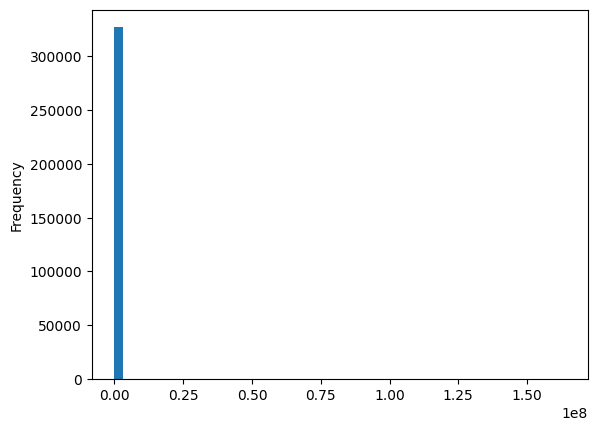

In [123]:
df2['운동량'].plot.hist(bins=50)

운동량은 범위가 굉장히 넓습니다. **최소값은 0인데, 최대값은 엄청 큰 값**이 존재합니다.

어쨌든, 운동량을 기준으로 데이터를 10개 그룹으로 분류하고 싶습니다.

`pd.cut()`을 활용하여 쉽게 그룹을 나눌 수 있습니다.

In [124]:
df2.head()

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,이용시간
0,2020-01-20,3,중랑센터,일일(회원),M,AGE_003,3,61.82,0.52,2230.00,3 days 03:00:00
1,2020-01-20,3,중랑센터,일일(회원),M,AGE_004,1,39.62,0.28,1220.00,0 days 15:00:00
2,2020-01-20,3,중랑센터,정기,M,AGE_005,3,430.85,4.01,17270.00,2 days 05:00:00
3,2020-01-20,5,상암센터 정비실,일일(회원),\N,AGE_005,2,1.79,0.02,90.00,1 days 09:00:00
4,2020-01-20,5,상암센터 정비실,정기,F,AGE_003,1,4501.96,45.47,196010.00,2 days 16:00:00


`bins` 옵션에 나누고자 하는 **구간의 개수**를 설정합니다.

In [125]:
# df2의 '운동량' 컬럼에 대해서 10개 구간으로 분할하여
# '운동량_cut' 이라는 컬럼을 추가합니다.
df2['운동량_cut'] = pd.cut(df2['운동량'], bins=10)
# bins : 똑같은 크기로 나눔
# right : 오른쪽을 포함, false로 설정할경우 왼쪽 포함/오른쪽 미포함
# labels : 레이블을 붙일 수 있음
df2['운동량_cut'].value_counts()

(-163936.052, 16393605.23]      326816
(98361631.38, 114755236.61]          9
(32787210.46, 49180815.69]           2
(16393605.23, 32787210.46]           1
(114755236.61, 131148841.84]         1
(147542447.07, 163936052.3]          1
(49180815.69, 65574420.92]           0
(65574420.92, 81968026.15]           0
(81968026.15, 98361631.38]           0
(131148841.84, 147542447.07]         0
Name: 운동량_cut, dtype: int64

In [126]:
# df2의 '운동량_cut' 컬럼의 분포를 확인합니다 (구간별 돗수확인)
df2['운동량_cut'].value_counts().sort_index()

(-163936.052, 16393605.23]      326816
(16393605.23, 32787210.46]           1
(32787210.46, 49180815.69]           2
(49180815.69, 65574420.92]           0
(65574420.92, 81968026.15]           0
(81968026.15, 98361631.38]           0
(98361631.38, 114755236.61]          9
(114755236.61, 131148841.84]         1
(131148841.84, 147542447.07]         0
(147542447.07, 163936052.3]          1
Name: 운동량_cut, dtype: int64

In [127]:
s = pd.Series(range(100))
pd.cut(s, bins = 5)

0     (-0.099, 19.8]
1     (-0.099, 19.8]
2     (-0.099, 19.8]
3     (-0.099, 19.8]
4     (-0.099, 19.8]
           ...      
95      (79.2, 99.0]
96      (79.2, 99.0]
97      (79.2, 99.0]
98      (79.2, 99.0]
99      (79.2, 99.0]
Length: 100, dtype: category
Categories (5, interval[float64, right]): [(-0.099, 19.8] < (19.8, 39.6] < (39.6, 59.4] <
                                           (59.4, 79.2] < (79.2, 99.0]]

In [128]:
s = pd.Series(range(100))
pd.cut(s, bins = 5, right=False)

0        [0.0, 19.8)
1        [0.0, 19.8)
2        [0.0, 19.8)
3        [0.0, 19.8)
4        [0.0, 19.8)
           ...      
95    [79.2, 99.099)
96    [79.2, 99.099)
97    [79.2, 99.099)
98    [79.2, 99.099)
99    [79.2, 99.099)
Length: 100, dtype: category
Categories (5, interval[float64, left]): [[0.0, 19.8) < [19.8, 39.6) < [39.6, 59.4) < [59.4, 79.2) <
                                          [79.2, 99.099)]

In [129]:
s = pd.Series(range(10))
pd.cut(range(10), bins = [0, 3, 5, 7, 10], right=False)

[[0, 3), [0, 3), [0, 3), [3, 5), [3, 5), [5, 7), [5, 7), [7, 10), [7, 10), [7, 10)]
Categories (4, interval[int64, left]): [[0, 3) < [3, 5) < [5, 7) < [7, 10)]

분포를 보니 첫 구간에 대부분의 데이터가 쏠려 있습니다. 딱봐도 올바르지 않은 방법 같아 보입니다.

`pd.cut()`은 **최소에서 최대 구간을 지정한 bin만큼 동일하게 분할** 하기 때문에 이런 현상이 발생할 수 있습니다.

고르게 분포한 데이터라면 괜찮지만, 튀는 **이상치(outlier)가 있는 경우에는 안 좋은 결과**를 초래 합니다.

## pd.qcut() - 동일한 갯수를 갖도록 구간 분할

`pd.cut()`과 유사하지만, **quantity 즉 데이터의 분포를 최대한 비슷하게 유지**하는 구간을 분할 합니다.

In [130]:
# df2의 '운동량' 컬럼에 대해서 데이터의 분포를 최대한 비슷하기 유지하며 10개 구간으로 분할하여
# '운동량_qcut' 이라는 컬럼을 추가합니다.
df2['운동량_qcut'] = pd.qcut(df2['운동량'], 10)

In [131]:
# df2의 '운동량_qcut' 컬럼의 분포를 확인합니다 (구간별 돗수확인)


구간도 예쁘게 분할(**균등하게 분할**)이 된 것 처럼 보입니다. 하지만, **간격은 일정하지 않습니다.**